In [19]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
import warnings
import matplotlib.pyplot as plt
import time
import concurrent.futures
import time
import umap as mp
from sklearn.cluster import KMeans

In [2]:
warnings.filterwarnings("ignore")

In [3]:
# read the data

df = pd.read_csv("wiki_movie_plots_deduped.csv")
df.head(1)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."


In [4]:
raw_data = df['Plot'].values.tolist()
print(f"There are {len(raw_data)} Texts")

There are 34886 Texts


<span style="color: cyan;"> **Vorbereitung von Daten** </span>

In [5]:
def my_nltk_tokenizer(doc):
    stopwörter = list(set(stopwords.words('english')))
    ps = PorterStemmer()
    tokens_lis = word_tokenize(doc, language='english') 
    tokens_lis = [element.lower() for element in tokens_lis if element.isalnum()]
    tokens_lis = [element for element in tokens_lis if element not in stopwörter]
    tokens_lis = [ps.stem(element) for element in tokens_lis]
    return  tokens_lis

In [6]:
def parallel_tokenize(docs):
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = [executor.submit(my_nltk_tokenizer, doc)for doc in docs]
        results = [future.result()for future in futures]
    return results

In [8]:
results = parallel_tokenize(raw_data)

In [9]:
print(results[:1])

[['bartend', 'work', 'saloon', 'serv', 'drink', 'custom', 'fill', 'stereotyp', 'irish', 'man', 'bucket', 'beer', 'carri', 'nation', 'follow', 'burst', 'insid', 'assault', 'irish', 'man', 'pull', 'hat', 'eye', 'dump', 'beer', 'head', 'group', 'begin', 'wreck', 'bar', 'smash', 'fixtur', 'mirror', 'break', 'cash', 'regist', 'bartend', 'spray', 'seltzer', 'water', 'nation', 'face', 'group', 'policemen', 'appear', 'order', 'everybodi', 'leav', '1']]


<span style="color: cyan;"> **Features Selektion** </span>

In [10]:
def my_tokenizer_pass_through(tokens):
    return tokens

In [11]:
start = time.time()
vectorizer_tfidf = TfidfVectorizer(tokenizer=my_tokenizer_pass_through, token_pattern=None, lowercase=False)
vecs_tfidf = vectorizer_tfidf.fit_transform(results)
print("Größe des Wörterbuches ==> " + str(len(vectorizer_tfidf.get_feature_names_out())), "\n")

vectorizer_tfidf = TfidfVectorizer(tokenizer=my_tokenizer_pass_through,min_df=5,  token_pattern=None, lowercase=False)
vecs_tfidf = vectorizer_tfidf.fit_transform(results)
print("Größe des Wörterbuches mit minimum Dokument Häufigkeit von (5) ==> " + str(len(vectorizer_tfidf.get_feature_names_out())), "\n")
end = time.time()

print("Ausführungszeit beträgt ", round(end-start, 3), "s")

Größe des Wörterbuches ==> 102299 

Größe des Wörterbuches mit minimum Dokument Häufigkeit von (5) ==> 27831 

Ausführungszeit beträgt  6.826 s


<span style="color: cyan;"> **Daten Visualisierung** </span>

In [12]:
reducer = mp.UMAP()
embedding = reducer.fit_transform(vecs_tfidf)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


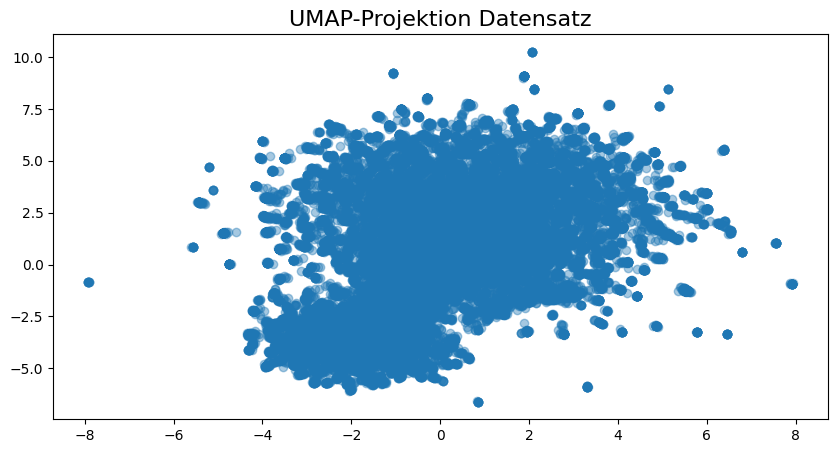

In [21]:
plt.figure(figsize=(10, 5))
plt.title('UMAP-Projektion Datensatz', fontsize=16)
plt.scatter(embedding[:, 0], embedding[:, 1],alpha=0.4)
plt.show()

In [15]:
kmeans = KMeans(n_clusters=15, random_state=42)
kmeans = kmeans.fit(vecs_tfidf)

In [18]:
df['label'] = kmeans.labels_

In [27]:
from pathlib import Path

Path().resolve().as_posix()
import os 
os.mkdir(str(Path().resolve())+'/setup.py')